In [1]:
!pip install plotnine

In [72]:
import sys
#sys.path.insert(0,'/PHShome/je92/miniconda3/envs/plotnine/lib/python3.6/site-packages/')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from glob import glob
import re
from statsmodels.stats.multitest import fdrcorrection
import seaborn as sns
from plotnine import *

In [73]:
## Path and directory
traits_path='/data/Segre_Lab/scripts/ECLIPSER/Snakemake_runs/Global_IOP_Khawaja_2024/data/traits'
#traits_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/Eye_traits_POAG_IOP_coloc_upd_5traits_022722'
#bNMF_POAG_clusters'
#Eye_traits_POAG_IOP_coloc_upd_5traits_022722'
#GTEx_traits_032523'
#Eye_traits_POAG_IOP_indep_6traits_120322'
#bNMF_POAG_clusters'
#Eye_traits_POAG_IOP_coloc_upd_3traits_022722'
#Eye_traits_POAG_IOP_indep_6traits_120322'
# 5 traits:
#Eye_traits_POAG_IOP_coloc_upd_5traits_022722'
# 3 traits: 
#Eye_traits_POAG_IOP_coloc_upd_3traits_022722'
# 7 traits: 
# Eye_traits_POAG_IOP_coloc_upd_7traits_022722' 
# Create the following output directory in working directory
#output_dir='output_eye_traits_coloc_wo_OpenTarg_tables_figures_upd_011022'
trait_df_GWASvar2gene='/data/Segre_Lab/scripts/ECLIPSER/Snakemake_runs/Global_IOP_Khawaja_2024/output/combined/trait_table.tsv'
#trait_df_GWASvar2gene='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/open_targets_CAD_trait_table_all_columns_Pval.tsv'
clump_path='/data/Segre_Lab/scripts/ECLIPSER/Snakemake_runs/Global_IOP_Khawaja_2024/output/clumping/IOP_AnteriorSegment'
#clump_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_5traits_020722'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_bNMF_clusters_subset_020622'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_5traits_020722'
#eye_clumping_files_coloc_IOP_POAG_indep_wo_OpenTargets_112822'
#clumping_GTEx_tissue_traits_032523'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_bNMF_clusters_subset_020622'
#eye_clumping_files_coloc_IOP_POAG_indep_wo_OpenTargets_112822'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_3traits_020722'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_bNMF_clusters_subset_020622'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_5traits_020722'
#eye_clumping_files_coloc_IOP_POAG_indep_wo_OpenTargets_112822'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_5traits_020722'
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_bNMF_clusters_subset_020622
#eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_subset_020722'
# 3 traits - POAG and IOP:  eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_subset_3traits_020722
# eye_clumping_files_all_eye_traits_wo_OpenTargets_POAG_IOP_coloc_upd_PP01_subset_020722'
# taken from: eye_clumping_files_all_eye_traits_coloc_upd_wo_OpenTargets_020622
opentarget_df='/data/Segre_Lab/scripts/ECLIPSER/ECLIPSER_GTEx_Aug15_2021/opentargets_variant_and_gene_table.csv'
#opentarget_df='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/opentargets_variant_and_gene_table.csv'

# Anterior Segment
sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/Snakemake_runs/Global_IOP_Khawaja_2024/output/AnteriorSegment_DEG_mod.csv'
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/HumanAnteriorEye_de_genes_per_type_added_rows_tiss.csv'
exp_name='Global_IOP_coloc_AntSeg'
#exp_name='Eye_traits_coloc_AntSegUpd'
output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/Snakemake_runs/Global_IOP_Khawaja_2024/output/ECLIPSER/IOP_enrichment_results'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/GTEx_traits_neg_cont_enrich_wo_OpenTarg_logFC03785_AntSeg_DGE_excl_class_032523'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_AntSeg_6traits_112922'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_AntSegUpd_subset_020622'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_AntSeg_coloc_upd_VCDR_ML_020822'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_AntSeg_coloc_upd_VCDR_ML_FINAL_022022'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_AntSeg_coloc_upd_IOP_POAG_indep_6traits_120322'
#output_dir='output_neg_cont_traits_wo_OpenTarg_tables_figures_GTEx_AntSeg_032623'
#output_dir='output_Global_IOP_w_OpenTarg_tables_figures_coloc_AntSeg_010125'
output_dir='output_Global_IOP_w_OpenTarg_tables_figures_coloc_AntSeg_clustering_010425'

# Optic Nerve Head
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/HumanOpticNerveHead_control_cells_type_markers_appended.csv'
#exp_name='Eye_traits_coloc_OpticNerveHead'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_OpticNerve_subset_020622'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_FINAL_020822'

# Optic Nerve Head w/o Retina, 13 donors
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/DE_gene_type_non_retinal_clean_HAMEL_Mod_3Nov2022.csv'
#exp_name='Eye_traits_coloc_OpticNerveHeadNoRet'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_ONH13_woRet_6traits_112922'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_ONH13_woRet_112922'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH13_woRet_subset_110422'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH13_woRet_subset_110422'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH13_woRet_110422'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH13_woRet_3traits_110422'
# eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH13_woRet_110422'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_ONHnoRet_111622'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_ONHnoRet_3traits_111622'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_ONHnoRet_7traits_113022'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_ONHnoRet_5traits_113022'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_IOP_POAG_indep_ONHnoRet_6traits_120322'

# Optic Nerve Head w/ Choroid, w/o Retina
# DGE excluding all cells within a cell class but the analyzed cell type
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/HumanONHONPPSSChoroidRPE_DGE_type_vs_all_others_excluding_types_in_same_class_mod_031023.csv'
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/de_per_cluster_min_5percent_01logfc_filtered_MOD_011923.csv'
#exp_name='POAG_coloc_OpticNerveHeadChoroid_new_DGE'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_subset_011923'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_POAG_IOP_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_celltype_excl_class_3_traits_031023'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_POAG_IOP_indep_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_celltype_excl_class_032123'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_POAG_IOP_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_celltype_excl_class_subset_031023'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_bNMF_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_celltype_excl_class_032123'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/GTEx_traits_neg_cont_enrich_wo_OpenTarg_logFC03785_ONH_Choroid_DGE_excl_class_032523'

#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_011923'
#eye_traits_enrich_bNMF_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_012423'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_ONH_Choroid_011923'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_ONH_Choroid_012423'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_IOP_POAG_indep_ONHChor_020223'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_IOP_POAG_VCDR_5traits_ONHChor_020223'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_IOP_POAG_VCDR_3traits_ONHChor_020223'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_bNMF_clusters_ONHChor_020223'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_031323'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_3_traits_031423'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_indep_032423'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_bNMF_032423'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_GTEx_032523'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_bNMF_UPD_040723'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_LeadingEdgePlots_050723'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_clusters_ONHChor_excl_class_DGE_5traits_061523_TEST'

# Retina, Rui Chen Lab
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/ml_class_markers_MOD_updatedDec22.csv'
#major_class_markers_updated_112822_HAMEL_edited_112922.csv'
# ml_class_markers_updated2_112822_HAMEL_edited_112922.csv '
# major_class_markers_updated_112822_HAMEL_edited_112922.csv 

#DGE_new_retina_RuiChen_snRNAseq_Arushi_120321_added_rows_tiss_inf.csv'
#exp_name='Eye_traits_RetinaChen_ml_class'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_Ret_ml_class_5perc_subset_020223'
#eye_traits_enrich_bNMF_coloc_upd_wo_OpenTarg_logFC03785_Ret_ml_class_5perc_020223'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_Ret_ml_class_5perc_subset_020223'
#GTEx_traits_neg_cont_enrich_wo_OpenTarg_logFC03785_ret_ml_class_DGE_excl_class_032523'
#eye_traits_enrich_bNMF_coloc_upd_wo_OpenTarg_logFC03785_Ret_ml_class_5perc_020223'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_Ret_ml_class_5perc_020223'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_Ret_ml_class_5perc_subset_020223'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_RetChen_major_class_112922'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_RetChen_ml_class_112922'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_RetChen_major_class_5traits_112922'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_RetChen_ml_class_filter25_5traits_112922'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_RetChen_major_class_5traits_112922'
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_RetChen_major_class_7traits_112922
#eye_traits_enrich_VCDR_ML_coloc_upd_wo_OpenTarg_logFC03785_RetinaChen_subset_020622'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_Retina_coloc_upd_VCDR_ML_FINAL_020822'
# ml_class:
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_RetinaChen_ml_class_5traits_113022'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_ONH_coloc_upd_VCDR_ML_RetinaChen_major_class_5traits_113022'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_IOP_POAG_indep_RetinaChen_ml_class_6traits_120222'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_IOP_POAG_indep_RetinaChen_major_class_6traits_120222'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_VCDR_ML_RetinaChen_ml_class_5traits_020323'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_IOP_indep_RetinaChen_ml_class_5traits_020323'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_bNMF_RetinaChen_ml_class_020323'
#output_dir='output_neg_cont_traits_wo_OpenTarg_tables_figures_GTEx_RetinaChen_ml_class_032623'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_VCDR_ML_RetinaChen_ml_class_5traits_040723'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_bNMF_RetinaChen_ml_class_040723'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_coloc_upd_POAG_VCDR_ML_RetinaChen_ml_class_5traits_LeadingEdgePlots_050723'

# Macula, Sanes Lab
#sc_df_file='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/data/HumanMacula_de_genes_per_type_added_rows_Hamel_18Mar_2022.csv'
#exp_name='Eye_traits_coloc_MaculaSanes'
#output_enrich_path='/data/Segre_Lab/scripts/ECLIPSER/eclipser_eye_traits/output/eye_traits_enrich_VCDR_ML_wo_OpenTarg_logFC03785_MaculaSanes_subset_5traits_031922'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_MaculaSanes_112922'
#GTEx_traits_neg_cont_enrich_wo_OpenTarg_logFC03785_Mac_DGE_excl_class_032523'
#eye_traits_enrich_coloc_IOP_indep_wo_OpenTarg_logFC03785_MaculaSanes_112922'
#eye_traits_enrich_VCDR_ML_wo_OpenTarg_logFC03785_MaculaSanes_subset_031922'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_Macula_coloc_upd_VCDR_ML_7_traits_042622'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_Macula_coloc_upd_IOP_POAG_indep_6traits_120322'
#output_dir='output_neg_cont_traits_wo_OpenTarg_tables_figures_GTEx_Mac_032623'
#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_Macula_coloc_upd_IOP_POAG_indep_6traits_fix_032822'

#output_dir='output_eye_traits_wo_OpenTarg_tables_figures_Macula_coloc_upd_VCDR_ML_5_traits_040723'

# Create output directory. Check first if exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print("Created Directory : ", output_dir)
else:
    print("Directory already existed : ",output_dir)

Directory already existed :  output_Global_IOP_w_OpenTarg_tables_figures_coloc_AntSeg_clustering_010425


In [74]:
output_dir

'output_Global_IOP_w_OpenTarg_tables_figures_coloc_AntSeg_clustering_010425'

In [75]:
def re_match(string, pattern, case_insensitive = True):
    """
    returns T/F indicating whether there is a match within string
    string: string to search for pattern
    pattern: pattern to look for
    case_insensitive: whether the function should disregard case
    """
    if case_insensitive:
        if (re.search(pattern, string, re.IGNORECASE)):
            return(True)
        else:
            return(False)
    else:
        if (re.search(pattern, string)):
            return(True)
        else:
            return(False)

In [76]:
## construct trait table, the first column is the generic trait name
# followed by GWAS names separated by semicolon
with open(traits_path+'/eye_traits.txt') as infile, open(output_dir+'/eye_all_traits.txt', 'w') as outfile:
    writer = csv.writer(outfile, delimiter='\t')
    f=csv.reader(infile, delimiter='\t')
    for line in f:
        writer.writerow([line[0],'; '.join([x for x in line[1:] if x])])

In [77]:
## Extract the generic trait names 
with open(traits_path+'/eye_traits.txt') as f:
    sig_traits = [x.split('\t') for x in f.read().splitlines()]
sig_traits0 = [x[0] for x in sig_traits]

## Read GWASVar2gene trait table, restrict to EUR subset
trait_df = pd.read_csv(trait_df_GWASvar2gene, sep='\t', dtype={'pubmed_id':str}, low_memory=False)
trait_df['GWAS_p_value']=trait_df['GWAS_p_value'].astype(float)
trait_df = trait_df.loc[trait_df['Sample_Ancestries'].apply(lambda x: re_match(x, 'EUR'))].copy() 
trait_df.reset_index(drop=True, inplace=True)

In [78]:
## Get all clumping files 
all_consolidated_clumping_file = [y for x in os.walk(clump_path) for y in glob(os.path.join(x[0], '*_consolidated_clumping.tsv'))]

## For each trait, count starting number of GWAS variants, GWAS loci after clumping, GWAS loci with mapped genes
table1=pd.DataFrame(columns=['trait','GWAS_variants','GWAS_loci','GWAS_loci_mapped_genes']) 
trait_df1=trait_df.copy()
for clump_file in all_consolidated_clumping_file:
    if clump_file.split('/')[-1]=='Null_consolidated_clumping.tsv': 
        continue
    else:
        clumps_df_orig=pd.read_csv(clump_file, sep='\t',index_col=0)
        clumps_df=pd.read_csv(clump_file, sep='\t',index_col=0).dropna()
        GWAS_name=clump_file.split('/')[-1][:-len('_consolidated_clumping.tsv')]
        idx=sig_traits0.index(GWAS_name)
        for trait in sig_traits[idx][1:]:
            
            trait_df1.loc[trait_df['trait'] == trait, 'trait'] = GWAS_name
        
        num_GWAS_variants=len(trait_df1.loc[trait_df1['trait']==GWAS_name,'GWAS_variant'].unique())
        table1=table1.append({'trait' : GWAS_name,'GWAS_variants':num_GWAS_variants,'GWAS_loci':clumps_df_orig.shape[0],'GWAS_loci_mapped_genes':clumps_df.shape[0]},  
                ignore_index = True) 


/tmp/ipykernel_91980/1935739008.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/tmp/ipykernel_91980/1935739008.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [79]:
table1.head()

,trait,GWAS_variants,GWAS_loci,GWAS_loci_mapped_genes
0,IOP,287,216,133
1,Intraocular_pressure,0,6,6


In [82]:
## Record pmid of each GWAS study, if there is no pmid and the GWAS is NEALE Lab, record 'UKBB_'
trait_tbl=pd.read_csv(output_dir+'/eye_all_traits.txt',sep='\t',header=None)
trait_tbl.columns=['trait','GWAS']
trait_tbl=trait_tbl.iloc[:37,:]

opentarget=pd.read_csv(opentarget_df)

for j in range(trait_tbl.shape[0]):
    GWAS_list=trait_tbl.loc[j,'GWAS'].split('; ')
    GWAS_list=opentarget['traitReported'][opentarget['traitReported'].isin(GWAS_list)].unique().tolist()
    GWAS_list_pmid=[]
    for i in range(len(GWAS_list)):
        find_trait=opentarget['traitReported'].str.split('; ').apply(lambda x:GWAS_list[i] in x)
        if re_match(opentarget.loc[find_trait,'ancestryInitial'].iloc[0],'EUR'):            
            pmid=','.join(opentarget.loc[find_trait,'pmid'].astype(str).unique())
            if (pmid=='nan') & (opentarget.loc[find_trait,'studyId'].str.contains('NEALE').any()):
                pmid=','.join('UKBB_'+opentarget.loc[find_trait,'studyId'].unique())
            elif pmid=='nan':
                pmid=','.join(opentarget.loc[find_trait,'studyId'].unique())
            GWAS_list_pmid.append(GWAS_list[i]+' ('+pmid+')')
    if len(GWAS_list_pmid)==0:
        continue
    GWAS_new=';'.join(GWAS_list_pmid)
    trait_tbl.loc[j,'GWAS']=GWAS_new

# trait_tbl.to_csv(output_dir+'/trait_GWAS_table.csv',index=None)

/tmp/ipykernel_91980/142540927.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.


In [83]:
trait_tbl.head()

,trait,GWAS
0,IOP,IOP
1,Intraocular_pressure,Intraocular_pressure


In [84]:
table1=table1.merge(trait_tbl,on='trait',how='left')
table1.to_csv(output_dir+'/Suppl_table_eye_traits_num_loci.csv',index=None)

## Enrichment table
### Merge enrichment table of each trait and tissue pair into a single table

In [85]:
#enrichment_tbl = [y for x in os.walk(output_enrich_path) for y in glob(os.path.join(x[0], '/table_*.csv'))]
enrichment_tbl = [output_enrich_path+"/"+x for x in os.listdir(output_enrich_path)]

In [86]:
df_all=[]
for tbl in enrichment_tbl:
    df=pd.read_csv(tbl)
    df_all.append(df)
df_all=pd.concat(df_all)

In [87]:
df_all

,Cell type,Fold-enrichment lower 95% CI,Fold-enrichment,Fold-enrichment upper 95% CI,Enrichment p-value,BH adj. Enrichment p-value (tissue-wide),Average GWAS locus set statistic,Fraction of GWAS loci >95% percentile of null loci,Leading edge genes,Leading edge GWAS loci,Leading edge genes source,GWAS,Tissue
0,CB_NPCE,0.991137,1.739993,2.760330,0.026692,0.131337,0.120690,0.112069,LTBP2;ADAMTS17;GLIS3;ADAM12;SLC2A12;HMCN1;PLEK...,"chr14_74618126_G_A_b38,chr14_74607613_G_A_b38,...","eo;o;o;o;e;o;eo,e;o;eo;e;o;eo;e,o",IOP,AnteriorSegment
1,CB_PCE,0.648546,1.240030,2.087491,0.242538,0.345839,0.102011,0.086207,"ABCA1;ADAMTS17;EYA2;LTBP1;FBXO32;ARID5B;PSAP,C...","chr9_104933258_T_C_b38,chr9_104933567_G_A_b38,...","o;o;eo;o;eo;o;e,se;eo;o;o",IOP,AnteriorSegment
2,Ciliary_Fibro,1.911443,2.808348,3.903586,0.000001,0.000039,0.224138,0.215517,CDH11;CTTNBP2;ANTXR1;TCF4;GLIS3;ANKH;LTBP2;RUN...,"chr16_65021937_G_T_b38,chr16_65046836_G_A_b38,...",eo;eo;o;o;o;seo;eo;o;o;o;eo;o;o;eo;o;o;seo;o;o...,IOP,AnteriorSegment
3,Ciliary_Muscle,0.615029,1.280387,2.286903,0.237378,0.345839,0.080460,0.068966,GLIS3;DGKG;LPP;FERMT2;TENT5A;LTBP1;FBXO32;ANGPT1,"chr9_4209584_T_C_b38,chr9_4217028_G_A_b38,chr9...",o;eo;so;o;o;o;eo;o,IOP,AnteriorSegment
4,Conj_Epi-Basal,0.959670,1.609236,2.471750,0.034562,0.149760,0.149425,0.129310,KLF5;ADAMTS17;ETS2;JAG1;PCSK5;EYA2;MYOF;TENT5A...,"chr13_73065233_G_A_b38,chr13_73075014_A_G_b38,...",seo;o;s;e;eo;eo;o;o;o;seo;o;o;o;eo;e,IOP,AnteriorSegment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,Scleral_Fibro,1.984659,5.400334,8.909975,0.002020,0.026260,0.500000,0.500000,GAS7;FNDC3B;ABCA1,"chr17_10127866_A_G_b38,chr17_10124163_G_A_b38,...",eo;o;o,Intraocular_pressure,AnteriorSegment
35,TM_Fibro,0.459684,2.844434,7.245729,0.103286,0.267389,0.166667,0.166667,FNDC3B,"chr3_172271486_T_G_b38,chr3_172274597_G_A_b38,...",o,Intraocular_pressure,AnteriorSegment
36,Uveal_Melanocyte,0.554213,3.460995,8.848838,0.073429,0.238644,0.250000,0.166667,"CAV1,CAV2","chr7_116510041_C_A_b38,chr7_116512971_A_C_b38,...","o,e",Intraocular_pressure,AnteriorSegment
37,Vasc_Endo1,0.941298,3.468900,6.801725,0.029408,0.140998,0.333333,0.333333,"CAV1,CAV2;FNDC3B","chr7_116510041_C_A_b38,chr7_116512971_A_C_b38,...","o,e;o",Intraocular_pressure,AnteriorSegment


In [88]:
df_all['BH adj. Enrichment P-value (Experiment-wide)']=fdrcorrection(df_all['Enrichment p-value'], alpha=0.05)[1]
df_all['Num of leading edge genes']=[len(set(x)) for x in df_all['Leading edge genes'].fillna("").str.split(';|,')]
df_all['Num of leading edge GWAS loci']=[len(set(x)) for x in df_all['Leading edge GWAS loci'].fillna("").str.split(';')]

In [89]:
df_all=df_all.sort_values(by='Enrichment p-value')
df_all=df_all[['GWAS','Tissue','Cell type','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)','BH adj. Enrichment P-value (Experiment-wide)','Fold-enrichment','Fold-enrichment lower 95% CI','Fold-enrichment upper 95% CI','Average GWAS locus set statistic','Fraction of GWAS loci >95% percentile of null loci','Leading edge genes','Num of leading edge genes','Leading edge genes source','Leading edge GWAS loci','Num of leading edge GWAS loci']]
df_all.to_csv(output_dir+'/GWAS_enrichment_table_080223.tsv',index=None,sep='\t')

## Heatmap and bubble map

In [90]:
#traits_of_interest=['Eye color','Central corneal thickness','Corneal structure','Macular thickness',
#                    'Cataract','Corneal resistance factor','Central corneal thickness','Corneal hysteresis','AMD_IAMDGC','Cataract_all_GWAS','IOP_UKBB','Optic_nerve_cup_area',
#                   'POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','POAG_NEIGHBORHOOD','Refractive_Error_Myopia_UKBB','VCDR','VCDR_ML_Alipanahi','VCDR_ML_Alipanahi']
#traits_of_interest=['Eye color','Central corneal thickness','Corneal structure','Macular thickness',
#                    'Cataract','Corneal resistance factor','Central corneal thickness','Corneal hysteresis','AMD_IAMDGC','Cataract_all_GWAS','IOP_UKBB','Optic_nerve_cup_area',
#                   'POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','POAG_NEIGHBORHOOD','Refractive_Error_Myopia_UKBB','VCDR','VCDR_ML_Alipanahi','VCDR_ML_Alipanahi']

traits_of_interest=['IOP']
#traits_of_interest=['IOP','Intraocular_pressure']

#traits_of_interest=['Central corneal thickness','Corneal hysteresis','Corneal_resistance_factor','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','VCDR_ML_Alipanahi','VCDR_ML_Han']
#traits_of_interest=['IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR_ML_Alipanahi']
# 7 traits
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','VCDR_ML_Alipanahi']
# 3 traits
#traits_of_interest=['POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','IOP_UKBB']
# 5 traits
#traits_of_interest=['IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','VCDR_ML_Alipanahi']
# IOP or POAG-independent or common genes
#traits_of_interest=['IOP_also_POAG','IOP_not_POAG','POAG_CrossAncestry_also_IOP','POAG_CrossAncestry_not_IOP','POAG_EUR_also_IOP','POAG_EUR_not_IOP']
# bNMF clusters:
#traits_of_interest=['POAG_bNMF_cluster1','POAG_bNMF_cluster2','POAG_bNMF_cluster3','POAG_bNMF_cluster4']

# w/o corneral traits
#traits_of_interest=['IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','VCDR_ML_Alipanahi']

#traits_of_interest=['POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','IOP_UKBB']

# GTEx
#traits_of_interest=['Breast_cancer','Heart_rate','Atrial_fibrillation','Coronary_artery_disease','lung_cancer','Lung_function','asthma','Chronic_obstructive_pulmonary_disease','Prostate_cancer','Prostate-specific_antigen_levels','Type_2_diabetes','Skin_pigmentation_traits','melanoma','Psoriasis','Atopic_Dermatitis']    


In [91]:
## Subset df_all to keep traits and cell types with at least one nomial/tissue-wide significant results
df_sub=df_all.copy()
df_sub

,GWAS,Tissue,Cell type,Enrichment p-value,BH adj. Enrichment p-value (tissue-wide),BH adj. Enrichment P-value (Experiment-wide),Fold-enrichment,Fold-enrichment lower 95% CI,Fold-enrichment upper 95% CI,Average GWAS locus set statistic,Fraction of GWAS loci >95% percentile of null loci,Leading edge genes,Num of leading edge genes,Leading edge genes source,Leading edge GWAS loci,Num of leading edge GWAS loci
2,IOP,AnteriorSegment,Ciliary_Fibro,0.000001,0.000039,0.000078,2.808348,1.911443,3.903586,0.224138,0.215517,CDH11;CTTNBP2;ANTXR1;TCF4;GLIS3;ANKH;LTBP2;RUN...,25,eo;eo;o;o;o;seo;eo;o;o;o;eo;o;o;eo;o;o;seo;o;o...,"chr16_65021937_G_T_b38,chr16_65046836_G_A_b38,...",25
35,IOP,AnteriorSegment,TM_Fibro,0.000004,0.000065,0.000130,2.721874,1.854057,3.784540,0.228448,0.215517,CDH11;ADAM12;LMX1B;GLIS3;FBXO32;ANKH;ALCAM;TCF...,25,eo;o;eo;o;eo;seo;eo;o;eo;o;o;o;eo;e;o;s;o;eo;s...,"chr16_65021937_G_T_b38,chr16_65046836_G_A_b38,...",25
11,IOP,AnteriorSegment,Iris_Fibro,0.000005,0.000065,0.000130,2.862657,1.906870,4.044110,0.202586,0.198276,CTTNBP2;CDH11;ADAM12;TCF4;FNDC3B;FBXO32;ARID5B...,23,eo;eo;o;o;o;eo;o;o;eo;eo;seo;s;o;o;o;e;seo;so;...,"chr7_117963766_G_C_b38,chr7_117960370_T_C_b38,...",23
20,IOP,AnteriorSegment,K_Fibro,0.000240,0.002340,0.004680,2.241973,1.464747,3.214065,0.202227,0.181034,LMX1B;ANPEP;CDH11;TENT5A;RUNX2;PLEKHA1;FNDC3B;...,21,eo;seo;eo;o;o;seo;o;s;o;o;o;eo;o;eo;o;eo;e;e;s...,"chr9_126628521_C_T_b38,chr9_126621621_G_A_b38,...",21
34,IOP,AnteriorSegment,Scleral_Fibro,0.000491,0.003830,0.007660,2.089045,1.381588,2.965129,0.198276,0.189655,ANTXR1;CDH11;GAS7;FNDC3B;ABCA1;TENT5A;ZFP36L2;...,22,o;eo;eo;o;o;o;o;o;o;eo;o;seo;o;o;seo;o;seo;o;o...,"chr2_69186028_C_T_b38,chr2_69184385_A_C_b38;ch...",22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,IOP,AnteriorSegment,Lens_Fiber,0.697367,0.746690,0.727040,0.814547,0.318748,1.648754,0.060345,0.043103,CLIC5;COL4A1;CTTNBP2;NPLOC4;SLC2A12,5,e;s;eo;se;e,chr6_45965420_C_T_b38;chr13_110247430_C_T_b38;...,5
28,IOP,AnteriorSegment,Mast,0.705013,0.746690,0.727040,0.842285,0.405700,1.498476,0.094109,0.068966,ADAM12;PRKAG2;ZFP36L2;MYO9B;EMID1;CTTNBP2;FNDC...,8,o;o;o;eo;eo;eo;o;e,chr10_126180175_A_G_b38;chr7_151801593_T_C_b38...,8
17,IOP,AnteriorSegment,K_Epi-Superficial,0.708398,0.746690,0.727040,0.848499,0.427085,1.462164,0.112428,0.077586,KLF5;PCSK5;KLF3;IBTK;RALGPS1;PLEKHA1;ABO;ZNF51...,9,seo;eo;e;o;seo;seo;seo;o;se,"chr13_73065233_G_A_b38,chr13_73075014_A_G_b38,...",9
16,IOP,AnteriorSegment,K_Epi-Basal,0.791497,0.812326,0.801776,0.762918,0.347258,1.403647,0.081897,0.060345,PCSK5;MYOF;IBTK;KLF3;PLEKHA1;USP40;KLF5,7,eo;o;o;e;seo;e;seo,"chr9_75904083_C_T_b38;chr10_93292662_G_A_b38,c...",7


In [92]:
df_sub=df_all.loc[df_all['GWAS'].isin([x.replace(' ', '_') for x in traits_of_interest]),:]

In [93]:
# keep traits and cell types that have at least one p-value less than 0.05
p_val_column='Enrichment p-value'  ##nominal 
# p_val_column='BH adj. Enrichment p-value (tissue-wide)'  ##tissue-wide

keep_GWAS=df_sub[['GWAS',p_val_column]].groupby(['GWAS']).min()[p_val_column]<=1
df_sub=df_sub.loc[keep_GWAS.loc[df_sub['GWAS']].values]

keep_cell=df_sub[['Cell type','Enrichment p-value']].groupby(['Cell type']).min()['Enrichment p-value']<=1
df_sub=df_sub.loc[keep_cell.loc[df_sub['Cell type']].values]
df_sub

,GWAS,Tissue,Cell type,Enrichment p-value,BH adj. Enrichment p-value (tissue-wide),BH adj. Enrichment P-value (Experiment-wide),Fold-enrichment,Fold-enrichment lower 95% CI,Fold-enrichment upper 95% CI,Average GWAS locus set statistic,Fraction of GWAS loci >95% percentile of null loci,Leading edge genes,Num of leading edge genes,Leading edge genes source,Leading edge GWAS loci,Num of leading edge GWAS loci
2,IOP,AnteriorSegment,Ciliary_Fibro,0.000001,0.000039,0.000078,2.808348,1.911443,3.903586,0.224138,0.215517,CDH11;CTTNBP2;ANTXR1;TCF4;GLIS3;ANKH;LTBP2;RUN...,25,eo;eo;o;o;o;seo;eo;o;o;o;eo;o;o;eo;o;o;seo;o;o...,"chr16_65021937_G_T_b38,chr16_65046836_G_A_b38,...",25
35,IOP,AnteriorSegment,TM_Fibro,0.000004,0.000065,0.000130,2.721874,1.854057,3.784540,0.228448,0.215517,CDH11;ADAM12;LMX1B;GLIS3;FBXO32;ANKH;ALCAM;TCF...,25,eo;o;eo;o;eo;seo;eo;o;eo;o;o;o;eo;e;o;s;o;eo;s...,"chr16_65021937_G_T_b38,chr16_65046836_G_A_b38,...",25
11,IOP,AnteriorSegment,Iris_Fibro,0.000005,0.000065,0.000130,2.862657,1.906870,4.044110,0.202586,0.198276,CTTNBP2;CDH11;ADAM12;TCF4;FNDC3B;FBXO32;ARID5B...,23,eo;eo;o;o;o;eo;o;o;eo;eo;seo;s;o;o;o;e;seo;so;...,"chr7_117963766_G_C_b38,chr7_117960370_T_C_b38,...",23
20,IOP,AnteriorSegment,K_Fibro,0.000240,0.002340,0.004680,2.241973,1.464747,3.214065,0.202227,0.181034,LMX1B;ANPEP;CDH11;TENT5A;RUNX2;PLEKHA1;FNDC3B;...,21,eo;seo;eo;o;o;seo;o;s;o;o;o;eo;o;eo;o;eo;e;e;s...,"chr9_126628521_C_T_b38,chr9_126621621_G_A_b38,...",21
34,IOP,AnteriorSegment,Scleral_Fibro,0.000491,0.003830,0.007660,2.089045,1.381588,2.965129,0.198276,0.189655,ANTXR1;CDH11;GAS7;FNDC3B;ABCA1;TENT5A;ZFP36L2;...,22,o;eo;eo;o;o;o;o;o;o;eo;o;seo;o;o;seo;o;seo;o;o...,"chr2_69186028_C_T_b38,chr2_69184385_A_C_b38;ch...",22
15,IOP,AnteriorSegment,K_Endo,0.003732,0.024258,0.032344,1.931453,1.212018,2.855144,0.170977,0.155172,SLC4A11;ALCAM;PKHD1;LMX1B;ADAM12;TES;GLIS3;TCF...,19,"s;eo;eo;eo;o;eo;o;o;e;e;eo,e;seo;o;o;seo;e;o;s","chr20_3230011_C_T_b38,chr20_3228437_G_A_b38;ch...",18
0,IOP,AnteriorSegment,CB_NPCE,0.026692,0.131337,0.140093,1.739993,0.991137,2.760330,0.120690,0.112069,LTBP2;ADAMTS17;GLIS3;ADAM12;SLC2A12;HMCN1;PLEK...,15,"eo;o;o;o;e;o;eo,e;o;eo;e;o;eo;e,o","chr14_74618126_G_A_b38,chr14_74607613_G_A_b38,...",13
23,IOP,AnteriorSegment,Lens_EquatorEpi,0.026941,0.131337,0.140093,1.781296,0.989785,2.881820,0.140805,0.103448,JAG1;ADAMTS18;DIRC3;THSD7A;VEGFA;DGKG;LINC0183...,13,"e;eo;e;o;e;eo;e,o;se;s;eo;o;eo","chr20_11196407_G_A_b38;chr16_77558038_G_A_b38,...",12
4,IOP,AnteriorSegment,Conj_Epi-Basal,0.034562,0.149760,0.149769,1.609236,0.959670,2.471750,0.149425,0.129310,KLF5;ADAMTS17;ETS2;JAG1;PCSK5;EYA2;MYOF;TENT5A...,15,seo;o;s;e;eo;eo;o;o;o;seo;o;o;o;eo;e,"chr13_73065233_G_A_b38,chr13_73075014_A_G_b38,...",15
31,IOP,AnteriorSegment,Pericyte2,0.038400,0.149760,0.157642,1.617855,0.944361,2.520489,0.133621,0.120690,"LPP;COL4A1;JAG1;ZEB2,TEX41;ANGPT1;LTBP1;CSPG4;...",16,"so;s;e;o,e;o;o;e;o;o;o;s;o;eo;o,e","chr3_188349165_T_G_b38,chr3_188348649_C_G_b38,...",14


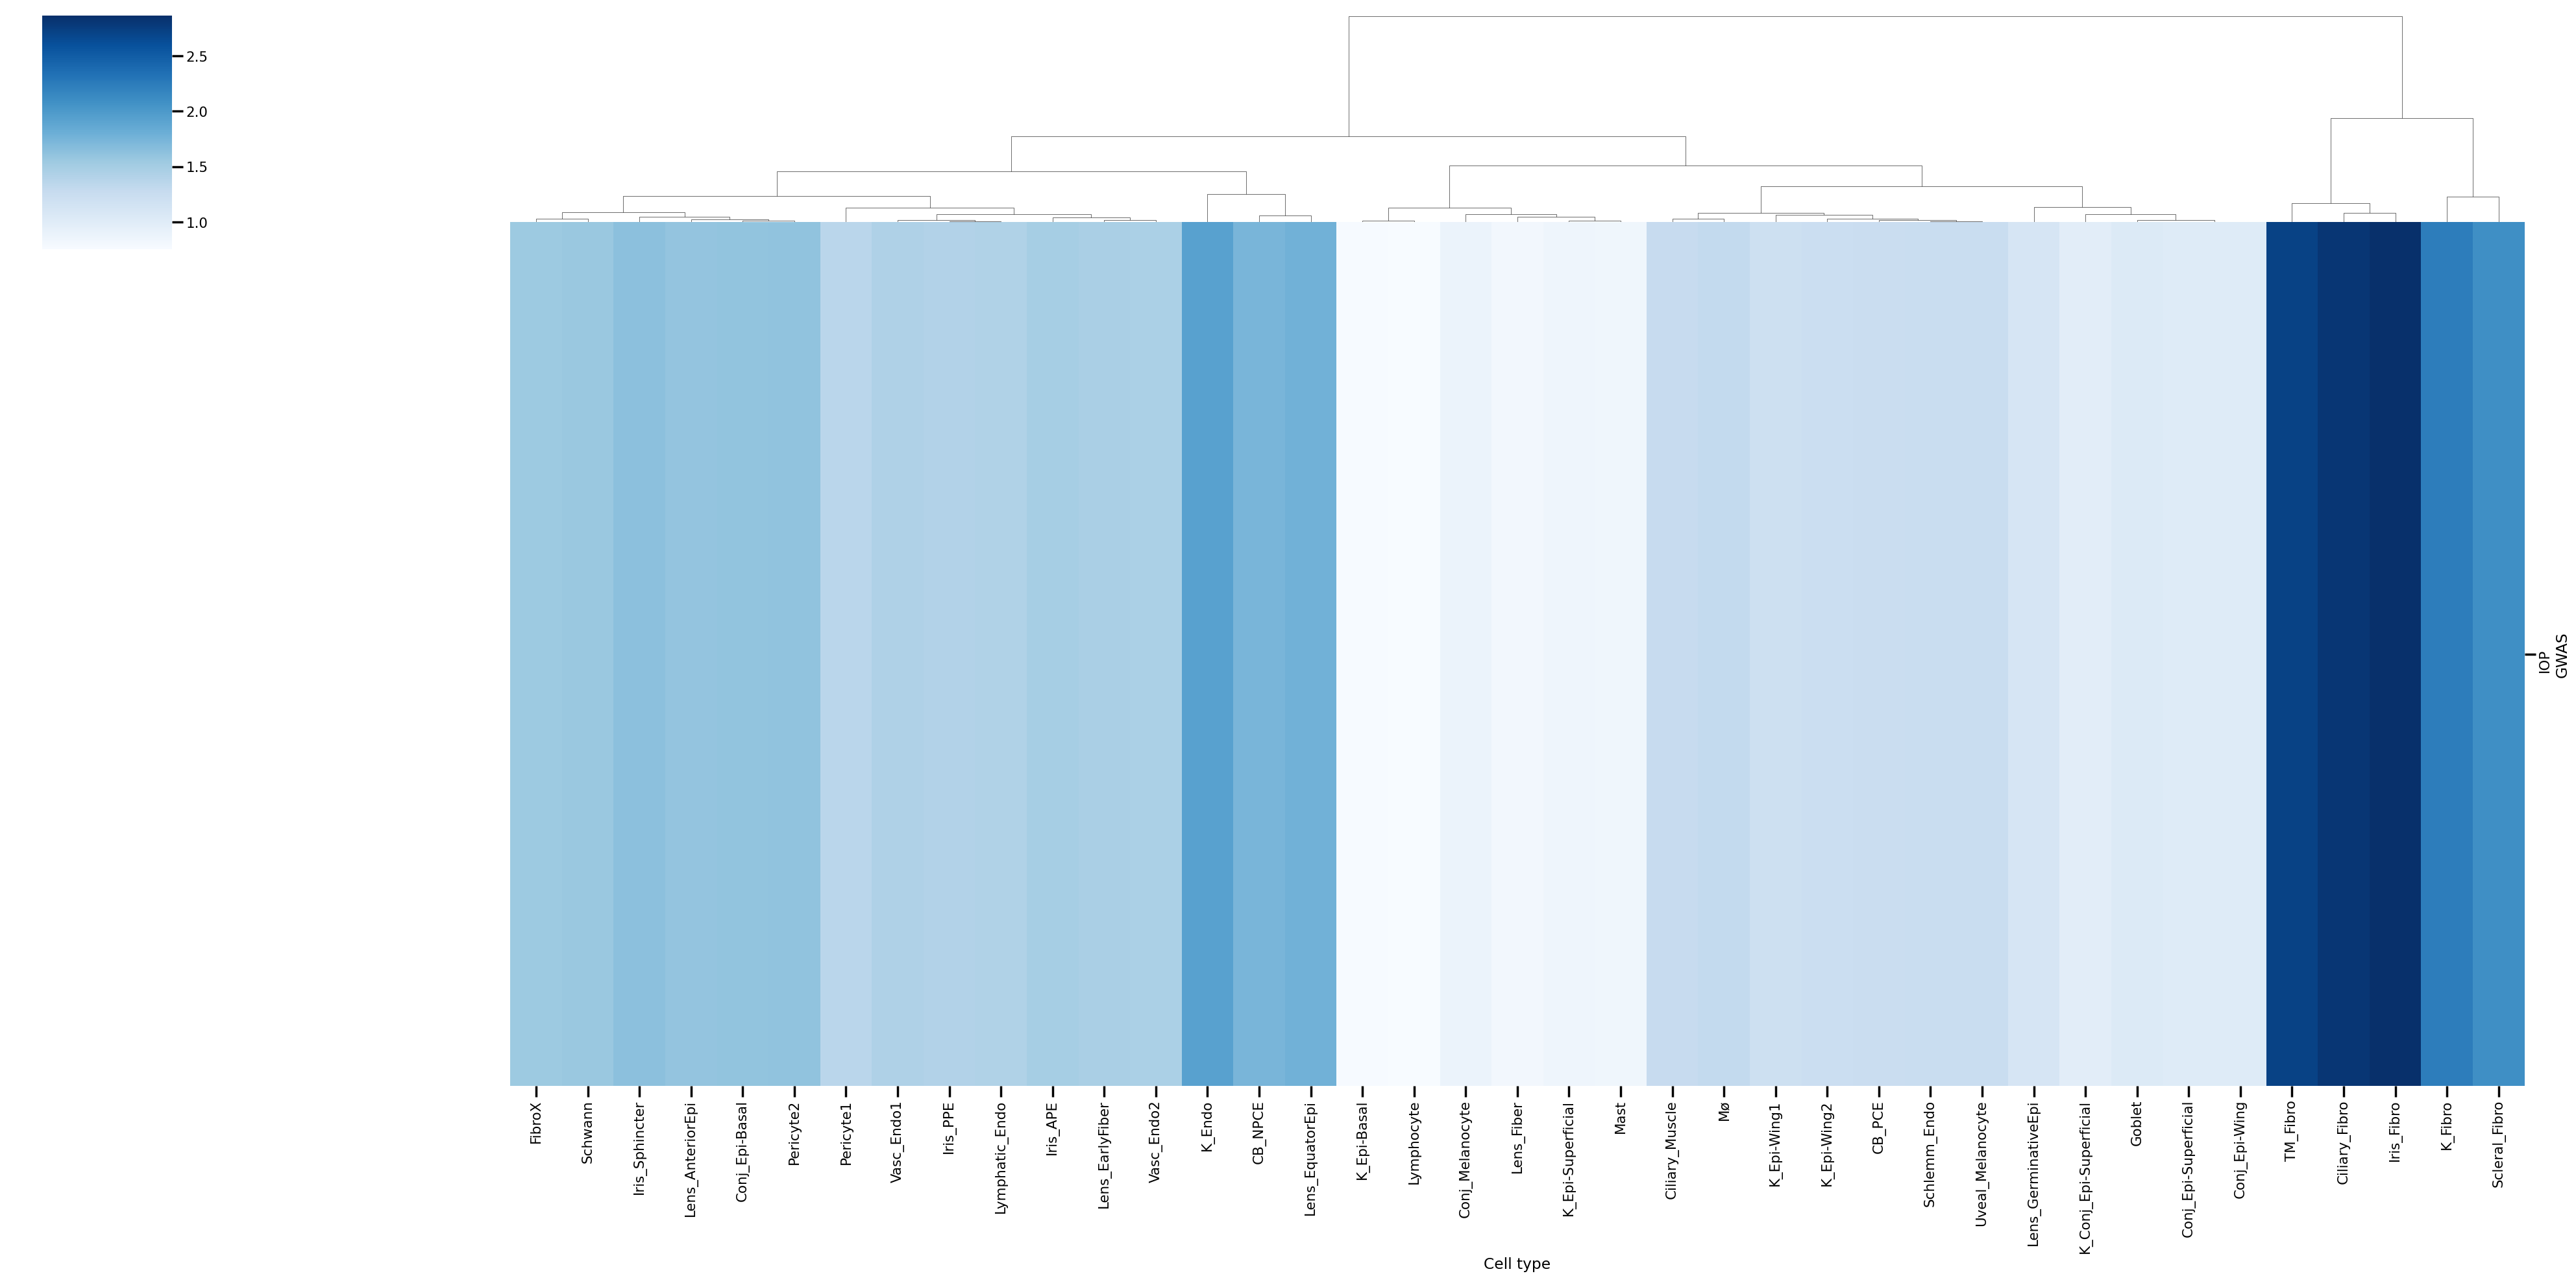

In [94]:
##get the GWAS order 
df_sub_fr=df_sub.pivot(index='GWAS', columns='Cell type', values='Fold-enrichment')
df_sub_fr=np.clip(df_sub_fr,None, 3.5)
# Add: row_cluster=False if only clustering one trait
g0 = sns.clustermap(df_sub_fr,row_cluster=False,cmap="Blues",figsize=(40,20))
cell_order=df_sub_fr.columns[g0.dendrogram_col.reordered_ind].tolist()
# Commend out if only clustering one trait
#GWAS_order=df_sub_fr.index[g0.dendrogram_row.reordered_ind].tolist()
#GWAS_order=1
#df_sub['GWAS']=df_sub['GWAS'].astype(str).astype('category').cat.reorder_categories(GWAS_order)
df_sub['Cell type']=df_sub['Cell type'].astype('category').cat.reorder_categories(cell_order)

In [95]:
# prepare data for heatmap 
df_sub_fr=df_sub.pivot(index='GWAS', columns='Cell type', values='Fold-enrichment')
df_sub_fr=np.clip(df_sub_fr,None, 3.5)
df_sub_p=df_sub.pivot(index='GWAS', columns='Cell type', values='Enrichment p-value')
df_sub_p=(df_sub_p<0.05).replace({0:"",1:"*"}).astype('str')

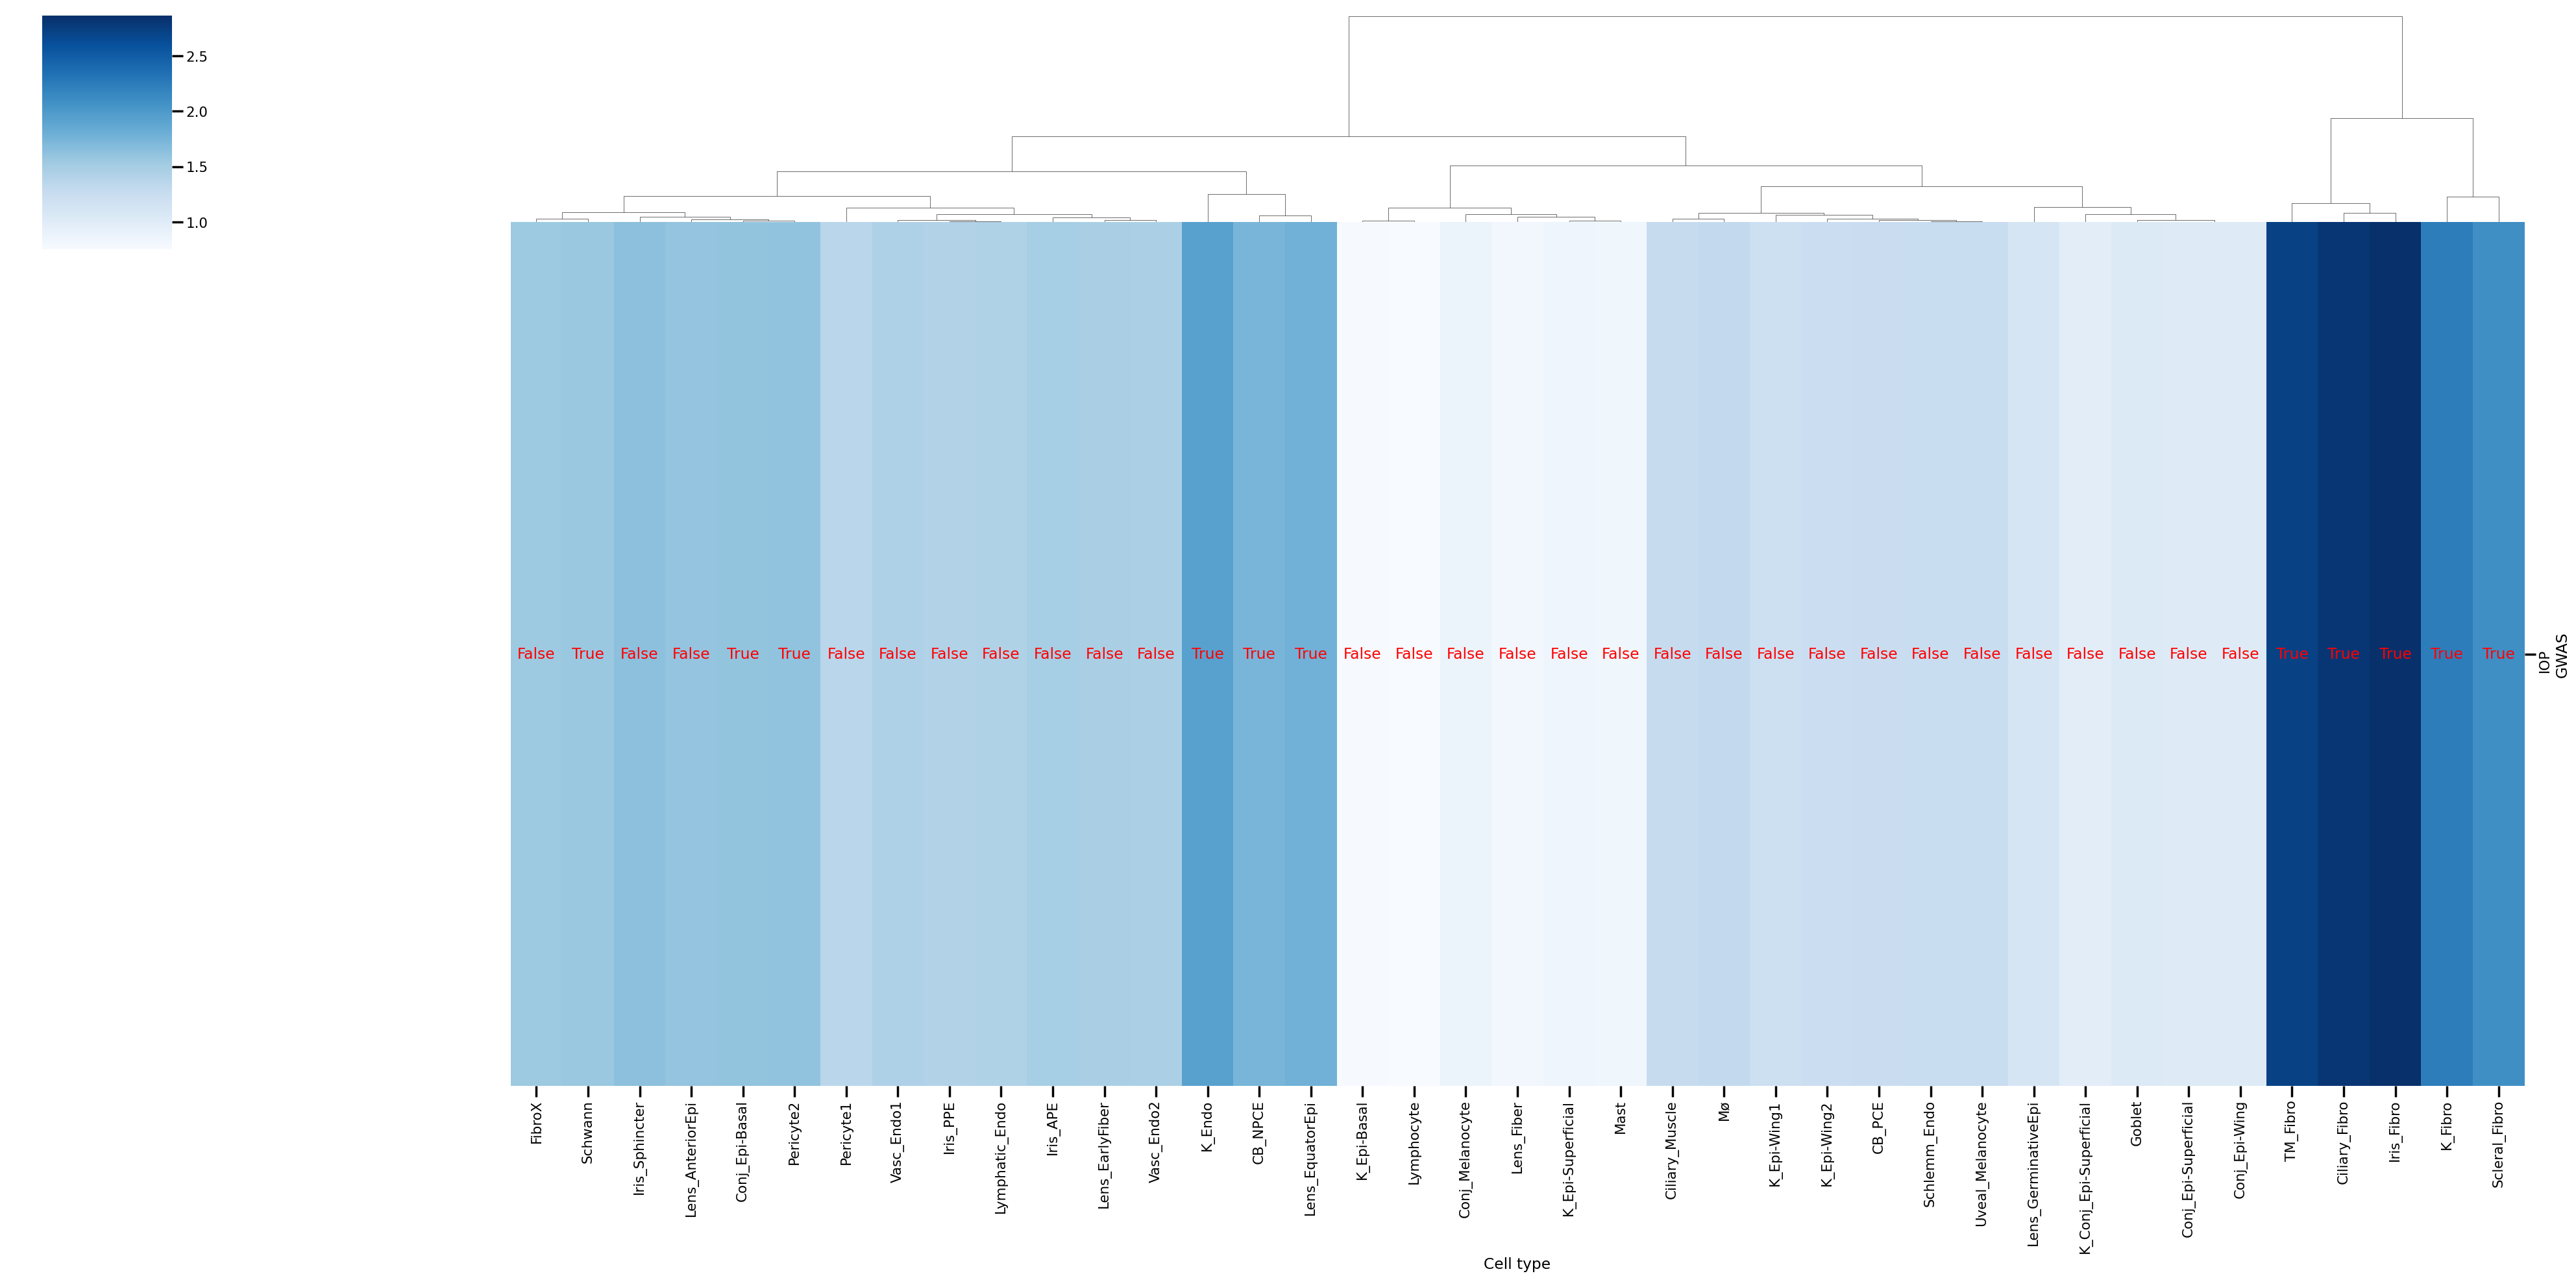

In [96]:
sns.set_context("poster",font_scale=0.7)
g1 = sns.clustermap(df_sub_fr, row_cluster=False, cmap="Blues",figsize=(40,20),annot=df_sub_p\
                    ,fmt='s',annot_kws={"color": 'red'})
# plt.savefig(output_dir+'/heatmap.png',bbox_inches='tight')

/gpfs/fs1/home/asegre/.conda/envs/py3104/lib/python3.10/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 11 x 0.75 in image.
/gpfs/fs1/home/asegre/.conda/envs/py3104/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: output_Global_IOP_w_OpenTarg_tables_figures_coloc_AntSeg_clustering_010425/Global_IOP_bubble_map_one_trait_w_Intraocular_010425.pdf


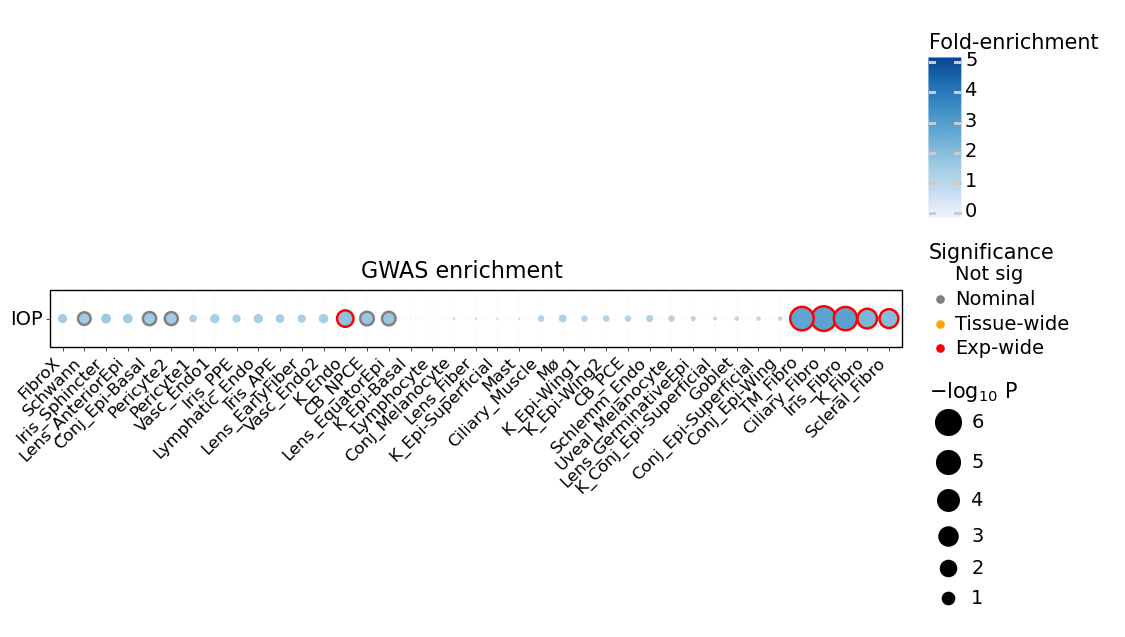

<ggplot: (2955101603108)>

In [97]:
df_sub['neglog_pval'] = -np.log10(np.clip(df_sub['Enrichment p-value'],1e-6,None))

df_sub['Significance'] = 'Not sig'
df_sub.loc[(df_sub['Enrichment p-value'] <0.05)&(df_sub['BH adj. Enrichment p-value (tissue-wide)'] >0.1), 'Significance'] = 'Nominal'
df_sub.loc[(df_sub['BH adj. Enrichment p-value (tissue-wide)'] <0.1)&(df_sub['BH adj. Enrichment P-value (Experiment-wide)'] >0.1), 'Significance'] = 'Tissue-wide'
df_sub.loc[(df_sub['BH adj. Enrichment P-value (Experiment-wide)'] <0.1), 'Significance'] = 'Exp-wide'

df_sub['Significance']=pd.Categorical(df_sub['Significance'],['Not sig','Nominal','Tissue-wide','Exp-wide'])
     
g = (
    ggplot(df_sub, aes(x='Cell type', y='GWAS')) +
    geom_point(aes(fill='Fold-enrichment', size='neglog_pval',color='Significance'), stroke=1)+
    scale_fill_distiller(type='seq', palette='Blues', direction=1, limits=[0, 5], name='Fold-enrichment') + 
    scale_color_manual(values={'Not sig':'white','Nominal':'gray','Tissue-wide':'orange','Exp-wide':'red'}, name='Significance') + 
    labs(y='', x='', title='GWAS enrichment') +
    guides(size = guide_legend(reverse=True)) +
    theme_linedraw() +
    scale_size(range = (0,9), name='$-\log_{10}$ P') +
    theme(panel_spacing_y=1.8,#2.5
     strip_text_x = element_text(size=15, color='black', angle = 0),
     strip_text_y = element_text(size=15, color='black', angle = 0),
     strip_background=element_rect(color='black', fill='white'),
    figure_size=(11,15*(df_sub.GWAS.nunique()/20)),
     legend_key=element_blank(),
     legend_title = element_text(size = 15),
     legend_text = element_text(size = 14),
     axis_text_x = element_text(rotation=45, hjust=1.,size=12),
     axis_text_y = element_text(size=14),
     title = element_text(size=16),
     panel_grid_major_x = element_line(color = '#E0E0E0'), ## change panel grid color to grey if saving to pdf 
     panel_grid_major_y = element_line(color = '#E0E0E0')
    )
)


#ggsave(g, output_dir+'/Macula_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_042622.pdf') 
#ggsave(g, output_dir+'/Macula_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_Pval05_042622.pdf') 

#ggsave(g, output_dir+'/Macula_all_eye_traits_VCDR_ML_LD_bubble_map_3_traits_042622.pdf') 
#ggsave(g, output_dir+'/Macula_all_eye_traits_VCDR_ML_LD_bubble_map_3_traits_Pval05_042622.pdf') 

#ggsave(g, output_dir+'/anterior_segment_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_012522.pdf') 
#ggsave(g, output_dir+'/anterior_segment_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_Pval05_012522.pdf') 
#ggsave(g, output_dir+'/anterior_segment_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_FDR01_022022.pdf') 
#ggsave(g, output_dir+'/anterior_segment_all_eye_traits_VCDR_ML_LD_bubble_map_5_traits_wo_corneal_FDR01_022022.pdf') 
#ggsave(g, output_dir+'/anterior_segment_all_eye_traits_VCDR_ML_LD_bubble_map_5_traits_wo_corneal_FDR01_Pval05_022022.pdf') 

#ggsave(g, output_dir+'/optic_nerve_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_012522.pdf') 
#ggsave(g, output_dir+'/optic_nerve_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_Pval05_012522.pdf')# 
#ggsave(g, output_dir+'/optic_nerve_all_eye_traits_POAG_IOP_bubble_map_3_traits_Pval05_0111622.pdf')
#ggsave(g, output_dir+'/optic_nerve_all_eye_traits_POAG_IOP_bubble_map_3_traits_0111622.pdf') 
#ggsave(g, output_dir+'/optic_nerve_all_eye_traits_POAG_IOP_bubble_map_7_traits_0111622.pdf') 
#ggsave(g, output_dir+'/optic_nerve_all_eye_traits_POAG_IOP_bubble_map_5_traits_0111622.pdf') 

#ggsave(g, output_dir+'/retina_Chen_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_012522.pdf') 
#ggsave(g, output_dir+'/retina_Chen_all_eye_traits_VCDR_ML_LD_bubble_map_7_traits_Pval05_012522.pdf') 
#ggsave(g, output_dir+'/AntSeg_all_eye_traits_POAG_IOP_bubble_map_6_traits_120322.pdf') 
#ggsave(g, output_dir+'/MaculaSanes_all_eye_traits_POAG_IOP_indep_bubble_map_6_traits_120322.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_indep_bubble_map_6_traits_020223.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_indep_bubble_map_6_traits_Pval05_020223.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_020223_2.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_Pval05_020223_2.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_3_traits_Pval05_020223.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_3_traits_020223.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_bNMF_clusters_bubble_map_020223.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_bNMF_clusters_bubble_map_Pval05_020223.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_Pval05_020323.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_020323.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_IOP_indep_bubble_map_5_traits_Pval05_020323.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_IOP_indep_bubble_map_020323.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_bNMF_bubble_map_020323.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_bNMF_bubble_map_Pval05_020323.pdf') 
##ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_bNMF_bubble_map_Pval05_rows_col_020323.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_pval05_031323.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_031323.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_3_traits_pval05_031323.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_3_traits_031323.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_3_traits_031423.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_indep_032423.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_IOP_VCDR_bubble_map_indep_Pval05_032423.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_bNMF_bubble_map_Pval05_032423.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_bNMF_bubble_map_032423.pdf') 
#ggsave(g, output_dir+'/ONHChor_all_eye_traits_POAG_bNMF_bubble_map_Pval05_3_traits_032423.pdf') 
#ggsave(g, output_dir+'/ONHChor_GTEx_neg_cont_15_traits_bubble_map_032523.pdf') 
#ggsave(g, output_dir+'/ONHChor_GTEx_neg_cont_15_traits_bubble_map_Pval05_032523.pdf') 
#ggsave(g, output_dir+'/ONHChor_GTEx_neg_cont_15_traits_bubble_map_Pval05_col_row_032523.pdf') 
#ggsave(g, output_dir+'/Ret_ml_class_GTEx_neg_cont_15_traits_bubble_map_032623.pdf') 
#ggsave(g, output_dir+'/Ret_ml_class_GTEx_neg_cont_15_traits_bubble_map_Pval05_032623.pdf') 
#ggsave(g, output_dir+'/Mac_class_GTEx_neg_cont_15_traits_bubble_map_Pval05_032623.pdf') 
#ggsave(g, output_dir+'/Mac_class_GTEx_neg_cont_15_traits_bubble_map_032623.pdf') 
#ggsave(g, output_dir+'/AntSeg_class_GTEx_neg_cont_15_traits_bubble_map_032623.pdf') 
#ggsave(g, output_dir+'/AntSeg_class_GTEx_neg_cont_15_traits_bubble_map_Pval05_032623.pdf') 
#ggsave(g, output_dir+'/MaculaSanes_all_eye_traits_POAG_IOP_indep_bubble_map_6_traits_fix_032822.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_040723.pdf') 
#ggsave(g, output_dir+'/Mlclass_RetinaChen_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_Pval05_040723.pdf') 
#ggsave(g, output_dir+'/Macula_Sanes_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_Pval05_040723.pdf') 
#ggsave(g, output_dir+'/Macula_Sanes_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_040723.pdf') 
#ggsave(g, output_dir+'/ONHChor_excl_cell_class_all_eye_traits_POAG_bNMF_bubble_map_040723.pdf') 
#ggsave(g, output_dir+'/ONHChor_excl_cell_class_all_eye_traits_POAG_bNMF_bubble_map_Pval05_040723.pdf') 
#ggsave(g, output_dir+'/Retina_ml_class_RuiChen_POAG_bNMF_bubble_map_Pval05_040723.pdf') 
#ggsave(g, output_dir+'/Retina_ml_class_RuiChen_POAG_bNMF_bubble_map_040723.pdf') 
#ggsave(g, output_dir+'/Macula_Sanes_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_050723.pdf') 
#ggsave(g, output_dir+'/ONHChor_excl_cell_class_all_eye_traits_POAG_IOP_VCDR_bubble_map_5_traits_050723.pdf') 
#ggsave(g, output_dir+'/Global_IOP_bubble_map_010125.pdf') 
#ggsave(g, output_dir+'/Global_IOP_bubble_map_Pval05_010125.pdf') 
#ggsave(g, output_dir+'/Global_IOP_bubble_map_one_trait_010425.pdf') 
#ggsave(g, output_dir+'/Global_IOP_bubble_map_one_trait_Pval05_010425.pdf') 
ggsave(g, output_dir+'/Global_IOP_bubble_map_one_trait_w_Intraocular_010425.pdf') 

g


In [122]:
def plot_CI(table,title):
    """
    plot 95% confidence interval of fold enrichment and p value from null permutations statistics and GWAS statistics
    """
#    table=table.sort_values(by='Fold-enrichment')
    table=table.sort_values(by='Enrichment p-value',ascending=False)
    fig, ax = plt.subplots(figsize=(10,10))
    
    for lower,median,upper,p_val,bh_p_val,y in zip(table['Fold-enrichment lower 95% CI'],table['Fold-enrichment'],table['Fold-enrichment upper 95% CI'],table['Enrichment p-value'],table['BH adj. Enrichment p-value (tissue-wide)'],range(len(table))):
   # for lower,median,upper,p_val,bh_p_val,y in zip(table['Fold-enrichment lower 95% CI'],table['Fold-enrichment'],table['Fold-enrichment upper 95% CI'],table['Enrichment p-value'],table['BH adj. Enrichment P-value (Experiment-wide)'],range(len(table))):  
        ax.plot((lower,median,upper),(y,y,y),'k-')
        ax.plot(median,y,'bo-')
        ax.plot(np.array(median)[p_val<0.05],np.array(y)[p_val<0.05],color='gray',marker='o',linestyle='-')
        ax.plot(np.array(median)[bh_p_val<0.1],np.array(y)[bh_p_val<0.1],color='red',marker='o',linestyle='-')
    ax.set(yticks=np.arange(table.shape[0]),yticklabels=table['Cell type'])
    ax.axvline(x=1)

#    l=[ax.scatter([],[], c=color,edgecolors='none') for color in ['red','orange','blue']]
# Gray: nominal p<0.05, orange: tissue-wide BH FDR<0.05, red: experiment-wide BH FDR<0.05 (colors used in bubblemap below)
    l=[ax.scatter([],[], c=color,edgecolors='none') for color in ['red','gray','blue']]

#    ax.legend(l,['FDR<0.1 (Experiment-wide)','Nominal p-value<0.05','Nominal p-value$\geq$0.05'],loc='lower right',fontsize=18)
    ax.legend(l,['FDR<0.1 (tissue-wide)','Nominal p-value<0.05','Nominal p-value$\geq$0.05'],loc='lower right',fontsize=18)
    plt.title(title,fontsize=22)
    plt.xlabel('Fold-Enrichment', fontsize=20)
    plt.yticks(size=16)
    plt.xticks(size=18)
    # apply x-axis limit
    #ax.set_xlim(0,4)
    return fig

In [123]:
#Tissue_fp='Macula'
#Tissue_fp='Retina'
#Tissue_fp='OpticNerveHead'
Tissue_fp='AnteriorSegment'

#Tissue_title='Macula'
#Tissue_title='Retina'
#Tissue_title='Optic Nerve Head'
Tissue_title='Anterior Segment'

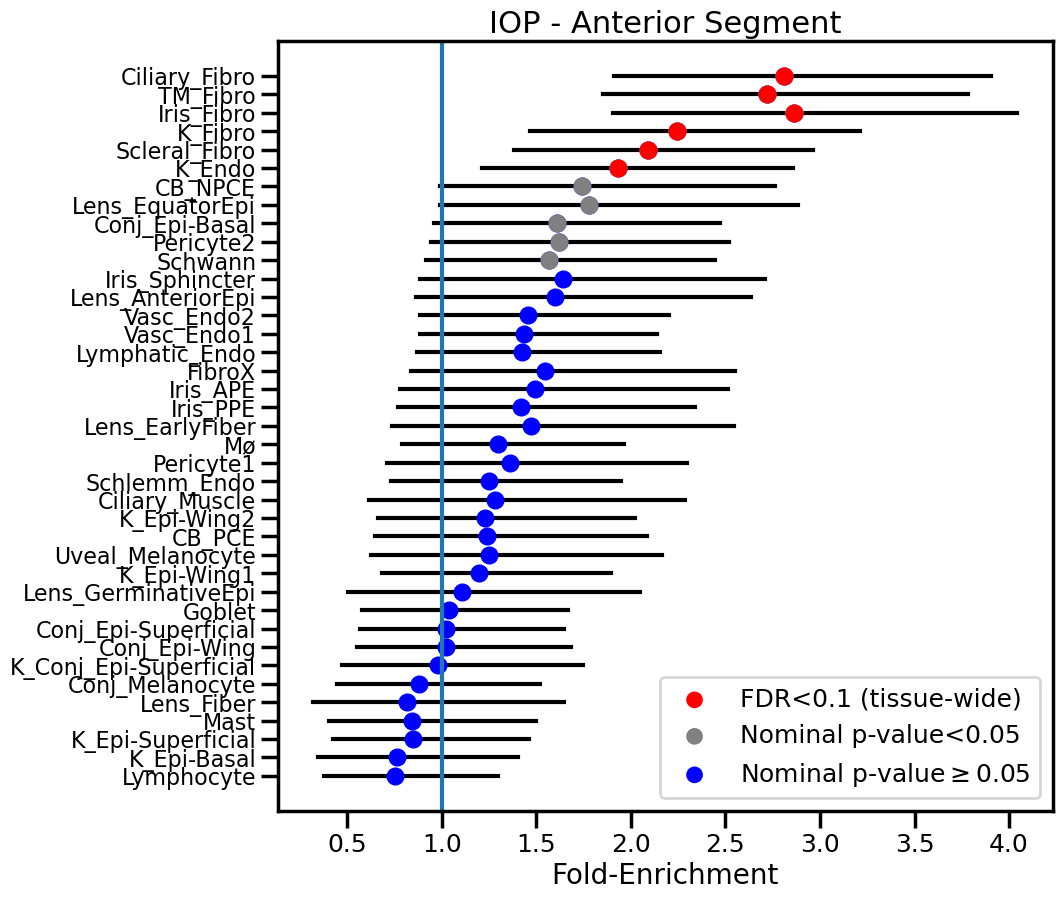

In [124]:
GWAS_fp='IOP'
#'POAG_bNMF_cluster4'
#'POAG_IGGC_CrossAncestry'

#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']

#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
#                    'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_PvalSort'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_PvalSort'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

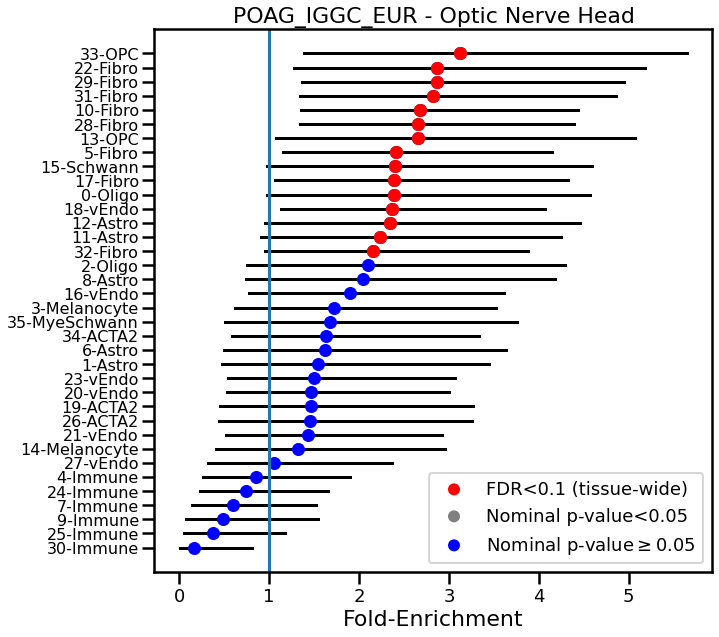

In [28]:
GWAS_fp='POAG_IGGC_EUR'
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']

#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
#                    'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

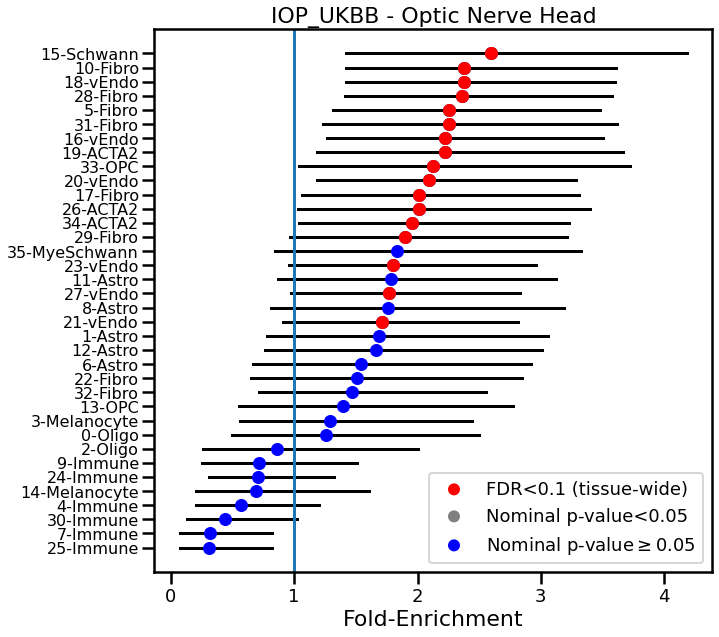

In [29]:
GWAS_fp='IOP_UKBB'
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']
#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
#                    'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

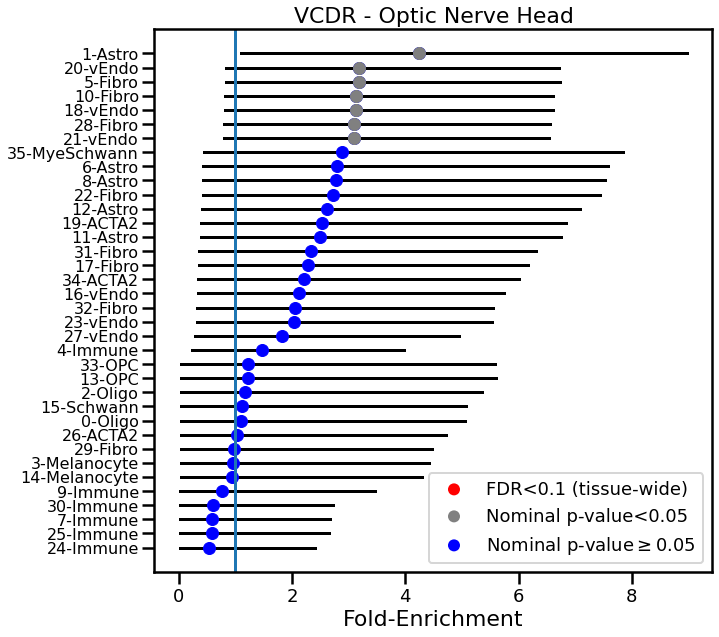

In [30]:
GWAS_fp='VCDR'
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']

#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
#                    'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

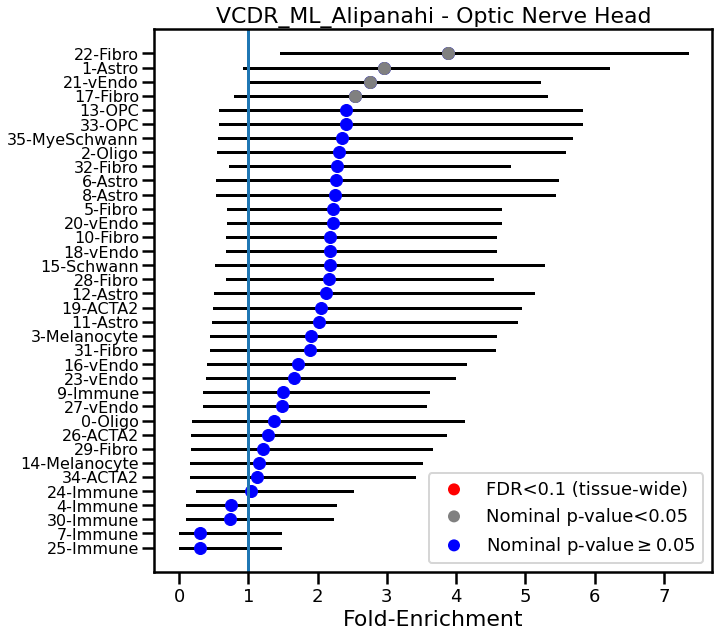

In [31]:
GWAS_fp='VCDR_ML_Alipanahi'
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']

#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
 #                   'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

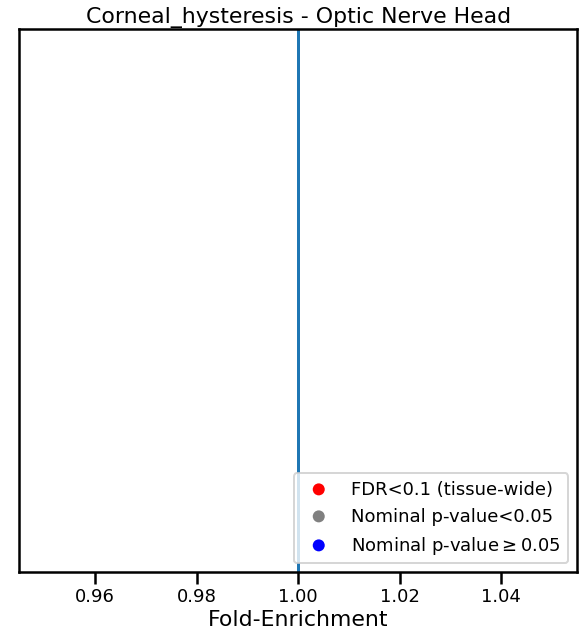

In [32]:
GWAS_fp='Corneal_hysteresis'
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']

#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
#                    'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

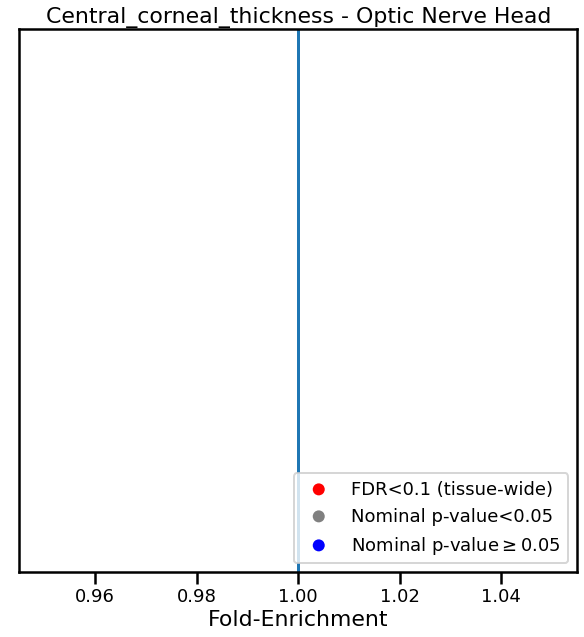

In [33]:
GWAS_fp='Central_corneal_thickness'
#traits_of_interest=['Central corneal thickness','Corneal hysteresis','IOP_UKBB','POAG_IGGC_CrossAncestry','POAG_IGGC_EUR','VCDR','Eye_color']

#case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),['Cell type','Fold-enrichment lower 95% CI','Fold-enrichment','Fold-enrichment upper 95% CI','Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]
case_df=df_all.loc[(df_all['GWAS']==GWAS_fp)&(df_all['Tissue']==Tissue_fp),
                   ['Cell type','Fold-enrichment lower 95% CI',
                    'Fold-enrichment','Fold-enrichment upper 95% CI',
#                    'Enrichment p-value','BH adj. Enrichment P-value (Experiment-wide)']]
                    'Enrichment p-value','BH adj. Enrichment p-value (tissue-wide)']]         
fig=plot_CI(case_df,title=GWAS_fp+' - '+Tissue_title)
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.png',bbox_inches='tight')
fig.savefig(output_dir+'/forest_plot_'+Tissue_fp+'_'+GWAS_fp+'.pdf',bbox_inches='tight')

In [36]:
## Leading-edge genes plot - Figure 5 (D)

In [90]:
## read differential expression table
sc_df = pd.read_csv(sc_df_file, sep=',')

In [91]:
## Select the leading-edge genes in the target tissue, trait and cell typGe
#GWAS_legp='POAG_IGGC_CrossAncestry'
#GWAS_legp='POAG_IGGC_EUR'
GWAS_legp='IOP_UKBB'
#GWAS_legp='VCDR'
#GWAS_legp='VCDR_ML_Alipanahi'
#GWAS_legp='Corneal_hysteresis'
#GWAS_legp='Central_corneal_thickness'

#Tissue_legp='Retina'
Tissue_legp='OpticNerveHead'
#Tissue_legp='AnteriorSegment'

Cell_legp='26-ACTA2'

leading_genes=df_all.loc[(df_all['GWAS']==GWAS_legp)&(df_all['Tissue']==Tissue_legp)&(df_all['Cell type']==Cell_legp),'Leading edge genes']
leading_genes=leading_genes.str.split(r";|,").tolist()[0]

In [92]:
## Select other tissues and cell types to plot the log2FC for the same genes 
Tissue_list=['OpticNerveHead'] #['OpticNerveHead'] #,'AnteriorSegment','AnteriorSegment','AnteriorSegment']
Cell_list=['26-ACTA2']#['K_Fibro']#,'Ciliary_Fibro']#,'Iris_Fibro'] #,'Ciliary_Fibro','Iris_Fibro','Scleral_Fibro']
logFC_cutoff=0.3785

In [93]:
# Extract rows from DGE table that correspond to cell types and cell list given above
plot_df=sc_df.loc[(sc_df['gene'].isin(leading_genes))&(sc_df['celltype'].isin(Cell_list)),:].copy()

# sort leading-edge genes from given trait and tissue based on log2FC
genes_order=plot_df.loc[(plot_df['celltype']==Cell_legp) & (plot_df['tissue']==Tissue_legp),:].sort_values(by='log2FC',ascending=False)['gene'].to_list()

# creating legend: tissue + celltype
plot_df['legend']=plot_df['tissue']+' '+plot_df['celltype']

# setting lower bound to -5; no upper bound
plot_df['log2FC']=np.clip(plot_df['log2FC'],-5, None)

# plot points for any tissue cell types if log2FC above 0 and fdr below 0.1
plot_df = plot_df.loc[(plot_df["pvals_fdr"] <= 0.1) & (plot_df["log2FC"] > logFC_cutoff)] 

# subset on tissue
plot_df = plot_df.loc[plot_df["tissue"].isin(Tissue_list)] 



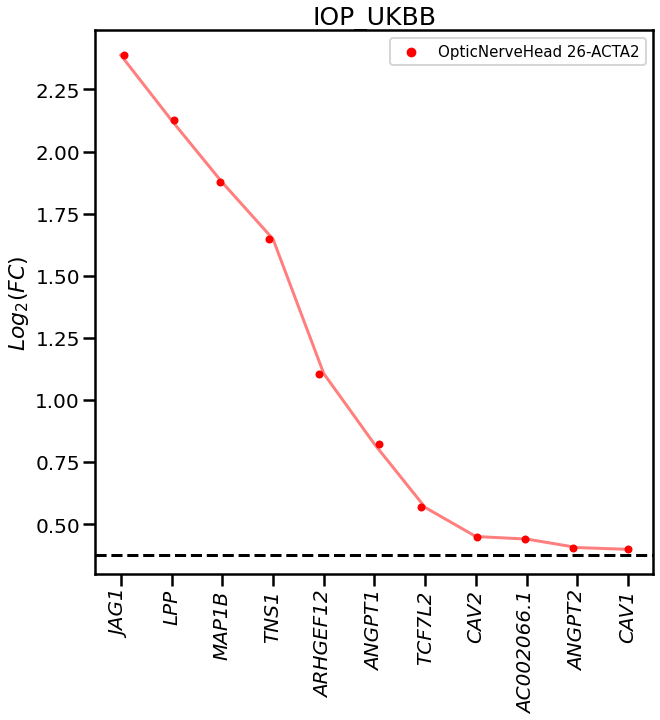

In [94]:
fig=plt.figure(figsize=(10,10))
plot_df['gene']=pd.Categorical(plot_df['gene'],genes_order)
sns.lineplot(data=plot_df.loc[plot_df['legend']=='OpticNerveHead 26-ACTA2',:], x="gene", y="log2FC",
             color='red',alpha=0.5, ci=None)
sns.stripplot(data=plot_df, x="gene", y="log2FC",hue="legend",size=8,\
              palette=sns.color_palette(["red","blue","magenta","orange"]),\
#              hue_order = ['AnteriorSegment Iris_Fibro','AnteriorSegment Ciliary_Fibro','AnteriorSegment FibroX','AnteriorSegment TM_Fibro'])
          #    hue_order = ['AnteriorSegment TM_Fibro','AnteriorSegment Ciliary_Fibro','AnteriorSegment Iris_Fibro'])
              hue_order = ['OpticNerveHead 26-ACTA2'])#,'AnteriorSegment Ciliary_Fibro'])

plt.xticks(rotation=90,size=20, style='italic')
plt.legend(loc='upper right',fontsize=15)
plt.xlabel('')
plt.ylabel('$Log_{2}(FC)$', fontsize=22)
plt.yticks(size=20)
plt.axhline(y=logFC_cutoff,linestyle='--',color='black')
plt.title(GWAS_legp,position=(0.5, 0.92),size=25)

# adds vertical lines where log2FC >= 0.5 for all cell types tested
#if (len(Cell_list)>1):
#for v in range(len(genes_order)):
#    if (plot_df.loc[(plot_df['gene']==genes_order[v]),'log2FC']>=logFC_cutoff).all() and len(plot_df.loc[(plot_df["gene"]==genes_order[v])]["celltype"]) ==len(Cell_list): # and statement 
#        plt.axvline(x=v,alpha=0.2,color="#737373", linewidth=3) # dark gray
#    elif len(plot_df.loc[(plot_df['gene']==genes_order[v]),'log2FC']>=logFC_cutoff) == 1:
#        plt.axvline(x=v,alpha=0.2,color="#FF7F7F", linewidth=3) # light red

#fig.savefig('AntSeg_POAG_cross_anc_Ciliary_fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig('AntSeg_CornealHyster_K_fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig('AntSeg_VCDR_TM_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig('ONH_POAG_cross_anc_Astrocyte_MG_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_3_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_3_Ciliary_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_Ciliary_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_Ciliary_Iris_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_Ciliary_Iris_TM_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_Iris_Ciliary_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_Iris_Ciliary_TM_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_TM_Ciliary_Iris_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_TM_Ciliary_Iris_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_trans_TM_Ciliary_Iris_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_trans_TM_Ciliary_Iris_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_TM_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_TM_Ciliary_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_TM_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_Ciliary_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_Pericyte2_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_Pericyte2_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_Pericyte2_LymphEndo_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_Pericyte2_LymphEndo_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_VCDR_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_VCDR_TM_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_VCDR_ML_Alipanahi_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_VCDR_ML_Alipanahi_TM_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_CornealHyst_K_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_CornealHyst_K_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_CornealCentralThickness_K_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_CornealCentralThickness_K_Fibro_leading_edge_genes.pdf',bbox_inches='tight')

#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_cross_anc_Iris_Fibro_leading_edge_genes.png',bbox_inches='tight')

#fig.savefig(output_dir+'/AntSeg_POAG_EUR_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_POAG_EUR_Iris_Fibro_leading_edge_genes.png',bbox_inches='tight')

#fig.savefig(output_dir+'/AntSeg_IOP_EUR_Ciliary_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_EUR_TM_Fibro_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/AntSeg_IOP_EUR_Pericyte2_leading_edge_genes.png',bbox_inches='tight')


#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_6_Astrocyte_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_4_Astrocyte_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_8_Astrocyte_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_22_OPC_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_10_Fibroblast_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_14_Fibroblast_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_15_Fibroblast_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_IOP_15_Fibroblast_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_11_vEndo_leading_edge_genes.png',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_POAG_cross_11_vEndo_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONH13woRet_IOP_11_vEndo_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_CA_17_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_CA_17_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_EUR_17_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_IOP_10_Fibro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_IOP_18_vEndo_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_IOP_16_vEndo_leading_edge_genes.pdf',bbox_inches='tight')

#fig.savefig(output_dir+'/ONHChor_woRet_POAG_EUR_15_Schwann_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_CA_15_Schwann_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_IOP_15_Schwann_leading_edge_genes.pdf',bbox_inches='tight')

#fig.savefig(output_dir+'/ONHChor_woRet_POAG_CA_33_OPC_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_EUR_33_OPC_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_IOP_33_OPC_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_POAG_CA_12_Astro_leading_edge_genes.pdf',bbox_inches='tight')

#fig.savefig(output_dir+'/Ret_ml_class_POAG_CA_Astro_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/Ret_ml_class_POAG_CA_MG_leading_edge_genes.pdf',bbox_inches='tight')

#fig.savefig(output_dir+'/Ret_ml_class_IOP_Astro_leading_edge_genes.pdf',bbox_inches='tight')

#fig.savefig(output_dir+'/ONHChor_woRet_POAG_CA_2_Oligo_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_IOP_19_ACTA2_leading_edge_genes.pdf',bbox_inches='tight')
#fig.savefig(output_dir+'/ONHChor_woRet_IOP_34_ACTA2_leading_edge_genes.pdf',bbox_inches='tight')
fig.savefig(output_dir+'/ONHChor_woRet_IOP_26_ACTA2_leading_edge_genes.pdf',bbox_inches='tight')

